# Cleaning Data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Environmental_Conditions_India_Noisy_Updated.csv')

In [4]:
df.head()

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Pressure (hPa),Disaster Occurred,Location
0,01-01-2025,26.236204,49.891265,36.499916,1013.814457,0.021673,Ahmedabad
1,02-01-2025,40.553312,49.555806,9.662649,1047.151542,0.000000,Thiruvananthapuram
2,03-01-2025,36.959818,34.092313,17.331985,1046.449852,0.000000,Visakhapatnam
3,04-01-2025,32.959755,68.581334,33.164032,971.897845,0.000000,Ahmedabad
4,05-01-2025,20.027887,57.489296,25.481055,1006.926387,0.000000,Bhopal


In [5]:
df['Disaster Occurred'].value_counts()

,count
Disaster Occurred,
0.000000,9651
1.000000,153
0.015653,15
0.088905,1
-0.086383,1
...,...
-0.116308,1
0.076976,1
-0.058525,1


In [7]:
df.isnull().sum()

,0
Date,19
Temperature (°C),0
Humidity (%),0
Wind Speed (km/h),0
Pressure (hPa),0
Disaster Occurred,0
Location,0


In [8]:
disaster_not_occurred = df[df['Disaster Occurred'] == 0]
disaster_occurred = df[df['Disaster Occurred'] == 1]

In [9]:
data = pd.concat([disaster_not_occurred, disaster_occurred])

In [10]:
data.shape

(9804, 7)

In [11]:
data.head()

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Pressure (hPa),Disaster Occurred,Location
1,02-01-2025,40.553312,49.555806,9.662649,1047.151542,0.0,Thiruvananthapuram
2,03-01-2025,36.959818,34.092313,17.331985,1046.449852,0.0,Visakhapatnam
3,04-01-2025,32.959755,68.581334,33.164032,971.897845,0.0,Ahmedabad
4,05-01-2025,20.027887,57.489296,25.481055,1006.926387,0.0,Bhopal
5,06-01-2025,29.824712,89.256079,36.928552,1020.021001,0.0,Nagpur


In [12]:
data.drop(['Date','Location'],axis=1,inplace=True)

In [13]:
data.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Pressure (hPa),Disaster Occurred
1,40.553312,49.555806,9.662649,1047.151542,0.0
2,36.959818,34.092313,17.331985,1046.449852,0.0
3,32.959755,68.581334,33.164032,971.897845,0.0
4,20.027887,57.489296,25.481055,1006.926387,0.0
5,29.824712,89.256079,36.928552,1020.021001,0.0


In [14]:
data['Disaster Occurred'].value_counts()

,count
Disaster Occurred,
0.0,9651
1.0,153


# EDA

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9804 entries, 1 to 9971
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature (°C)   9804 non-null   float64
 1   Humidity (%)       9804 non-null   float64
 2   Wind Speed (km/h)  9804 non-null   float64
 3   Pressure (hPa)     9804 non-null   float64
 4   Disaster Occurred  9804 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 459.6 KB


In [15]:
# convert label into int
data['Disaster Occurred'] = data['Disaster Occurred'].astype(int)

In [16]:
data['Disaster Occurred'].value_counts()

,count
Disaster Occurred,
0,9651
1,153


In [17]:
data.describe()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Pressure (hPa),Disaster Occurred
count,9804.000000,9804.000000,9804.000000,9804.000000,9804.000000
mean,29.816071,60.384615,25.004414,999.776798,0.015606
std,8.567279,23.004510,14.440146,32.675825,0.123951
min,-5.000000,18.641943,-11.903739,886.309582,0.000000
25%,22.490062,40.641218,12.755444,973.589010,0.000000
50%,29.824712,60.371889,25.059551,999.864381,0.000000
75%,37.082896,80.272281,37.191617,1025.972213,0.000000
max,47.754073,150.000000,150.000000,1115.562248,1.000000


In [19]:
corr_matrix = data.corr()
corr_matrix

,Temperature (°C),Humidity (%),Wind Speed (km/h),Pressure (hPa),Disaster Occurred
Temperature (°C),1.000000,-0.004982,-0.003950,0.008178,0.147170
Humidity (%),-0.004982,1.000000,-0.024450,-0.015730,0.160449
Wind Speed (km/h),-0.003950,-0.024450,1.000000,-0.005410,0.125825
Pressure (hPa),0.008178,-0.015730,-0.005410,1.000000,-0.099714
Disaster Occurred,0.147170,0.160449,0.125825,-0.099714,1.000000


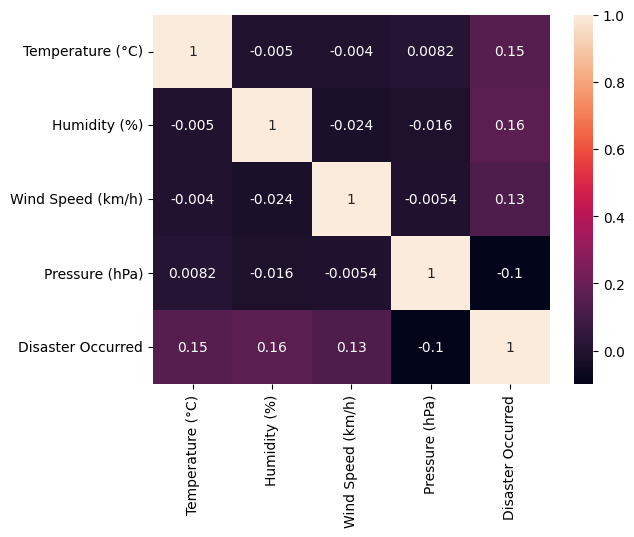

In [20]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

there is no need to drop any columns

In [23]:
data.dtypes

,0
Temperature (°C),float64
Humidity (%),float64
Wind Speed (km/h),float64
Pressure (hPa),float64
Disaster Occurred,int64


In [25]:
data.isnull().sum()

,0
Temperature (°C),0
Humidity (%),0
Wind Speed (km/h),0
Pressure (hPa),0
Disaster Occurred,0


In [28]:
# change columns name
data.columns = ['Temperature','Humidity','Wind Speed','Pressure','Disaster Occurred']

In [32]:
data.head()

,Temperature,Humidity,Wind Speed,Pressure,Disaster Occurred
1,40.553312,49.555806,9.662649,1047.151542,0
2,36.959818,34.092313,17.331985,1046.449852,0
3,32.959755,68.581334,33.164032,971.897845,0
4,20.027887,57.489296,25.481055,1006.926387,0
5,29.824712,89.256079,36.928552,1020.021001,0


In [34]:
data.shape

(9804, 5)

### Hsitogram for all feature

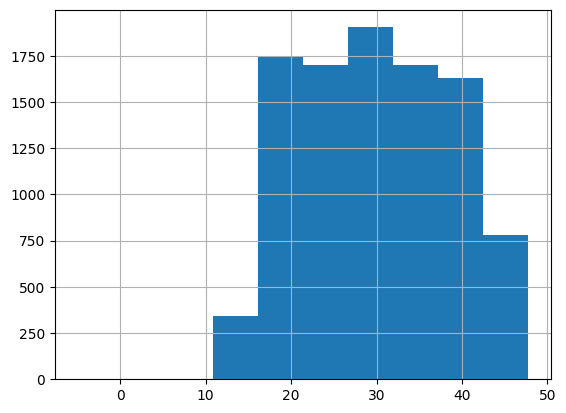

In [33]:
data['Temperature'].hist()
plt.show()

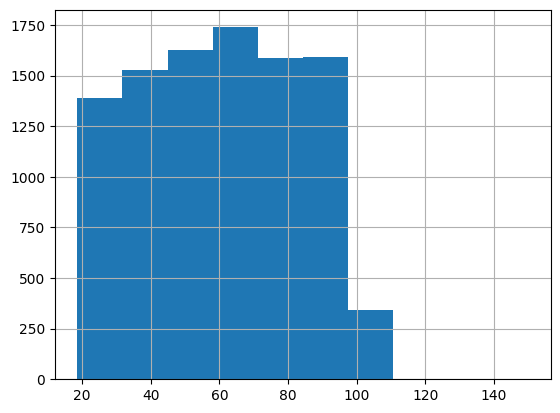

In [36]:
data['Humidity'].hist()
plt.show()

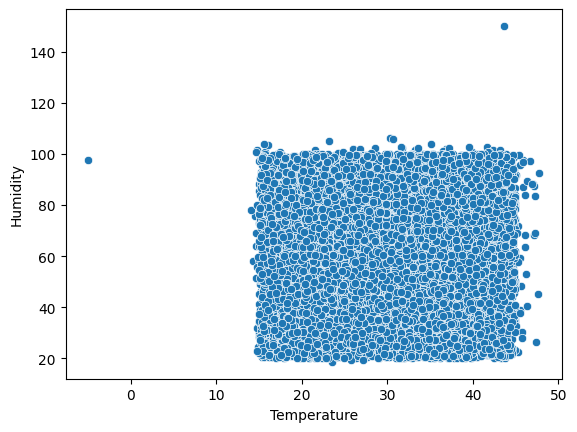

In [37]:
sns.scatterplot(x='Temperature', y='Humidity', data=data)
plt.show()

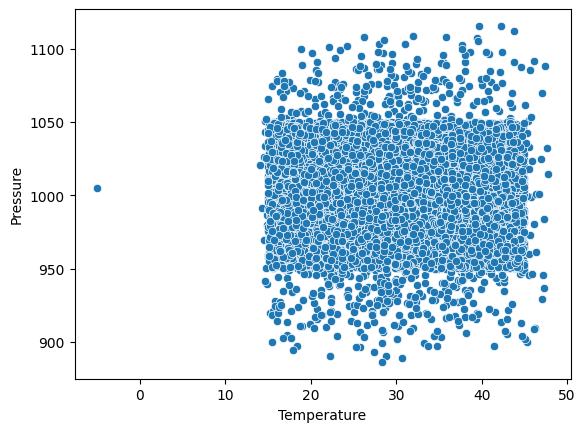

In [38]:
sns.scatterplot(x='Temperature', y='Pressure', data=data)
plt.show()